In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# load MNIST data
(train_images, train_labels), (test_images, test_labels)=datasets.mnist.load_data()

In [4]:
# preprocessing: normalize pixel values between 0&1
train_images=train_images/255
test_images=test_images/255

In [5]:
# reshape imgs to (28,28,1) as they are grayscale
train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1))

In [6]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [7]:
model=models.Sequential()

In [8]:
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))

C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

In [ ]:
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))

In [13]:
# o/p layer with 10 neurons
model.add(layers.Dense(10,activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9498 - loss: 0.1727 - val_accuracy: 0.9790 - val_loss: 0.0639
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9848 - loss: 0.0504 - val_accuracy: 0.9891 - val_loss: 0.0347
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9893 - loss: 0.0347 - val_accuracy: 0.9846 - val_loss: 0.0455
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9913 - loss: 0.0271 - val_accuracy: 0.9902 - val_loss: 0.0297
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9935 - loss: 0.0205 - val_accuracy: 0.9912 - val_loss: 0.0265


In [ ]:
# evaluate model on test data
test_loss, test_acc=model.evaluate(test_images, test_labels)
print(f"test accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0265
test accuracy: 99.12%


In [ ]:
# make predictions on test images
predictions=model.predict(test_images)
print(f"prediction for first test img: {np.argmax(predictions[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
prediction for first test img: 7


In [29]:
predicted = np.argmax(predictions[4])
actual = test_labels[4]

print("Predicted:", predicted)
print("Actual:", actual)


Predicted: 4
Actual: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


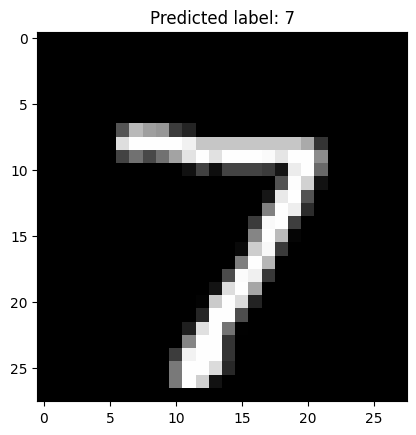

In [28]:
plt.imshow(test_images[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted label: {predictions[0].argmax()}")
plt.show()